## Circular membrane vibrations. Plotly animation 

The study of circular membrane vibration is of interest in acoustical applications. Circular membranes are  components  of drums, microphones and other devices.

The free vibrations of a circular membrane of radius $a$, are modeled by the two dimensional wave equation

$$ u_{tt}=c^2\Delta u$$

expressed in polar coordinates $(r, \theta)$:
    $$
    u_{tt}=c^2(u_{rr}+\displaystyle\frac{1}{r}u_r+\displaystyle\frac{1}{r^2}u_{\theta\theta}),
    $$ 
    with the boundary condition
        $$u(r=a, \theta, t)=0, $$
 that imposes zero membrane deflection on the circular boundary.  

Usually to get the analytical solution $u(r, \theta, t)$, we should
 set the initial displacement, $u(r, \theta,0)=d(r,\theta)$, and the initial velocity, $u_t(r,\theta,0)=v(r, \theta)$ of the membrane. 
But our goal here is  to derive  and animate  the vibrational modes (eigenfunctions) of
the circular membrane, and in this case these initial conditions are not involved.

Using the method of separation of variables, i.e. looking for a solution of the form $u(r,\theta, t)=R(r)f(\theta)T(t)$, we get  the vibrational modes (eigenfunctions):
    $$ u_{nm}(r, \theta, t)=J_n(r\cdot z_{nm}/a)\cos(n\theta)\cos(c\cdot z_{mn}t/a),$$
where    $J_n$ is the Bessel function of the first kind and integer order, $n\geq 0$, and $z_{nm}$ is the $m^{th}$ positive zero
of the function $J_n$.

Below are illustrated the graphs of the Bessel functions $J_0, J_1, J_2$, colored respectively with red, blue and green,  as well as the first three positive zeros, $z_{11}, z_{12}, z_{13}$, of the function $J_1(x)$.


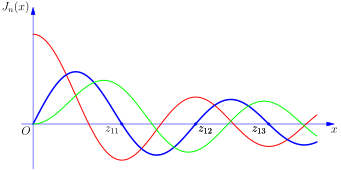

In [1]:
from IPython.display import SVG
SVG(filename="data/Bessel.svg")

In a vibrating membrane  the points  $(r, \theta)$,  that don't move, i.e. $u(r,\theta, t)=u(r, \theta, 0)$,
for any $t>0$, are called nodes. A vibrating circular membrane can exhibit diametrical nodes, respectively circular nodes. 

The integers $n=0,1,2, \ldots, m=1,2,\ldots$ in the eigenfunction notation, $u_{nm}$, defined above, give 
the number of diametrical nodes, respectively circular nodes, i.e. the number of diameters, respectively circles in the disk of radius $a$ that do not move during the vibration. By the boundary condition, the membrane boundary is a node line. 


For example $u_{12}(r, \theta, t)$ has one diameter and two circles consisting entirely in nodes. 

Across the WEB there are a lot of animations of vibrational modes of the circular membrane, including the 
[Wikipedia page](https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane), 
but usually they do not point out the node lines for each illustrated mode.

Here we define a function to animate the modes $u_{nm}(r,\theta, t)$, via Python Plotly animation, and plot each surface
$z=u_{nm}(r, \theta, t)$ (where   t is running through the   points in a grid over the animation time interval)  with a  diverging colorscale.
 So  we  illlustrate  both the membrane vibration  and its node lines, as lines colored with the central color of the diverging colormap.

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [3]:
import numpy as np
from scipy.special import jn, jn_zeros  #Bessel functions of the first kind,  and their zeros

`jn(n, x)` evaluates  $J_n(x)$.

The first `nz` positive zeros of the Bessel function $J_n$ are returned by the function `scipy.special.jn_zeros(n,nz)`:

In [4]:
n=1
nz=3

jn_zeros(n,nz)

array([ 3.83170597,  7.01558667, 10.17346814])

In [5]:
def vibrate(membrane_radius=1.0, n=0, m=1, N=50, pl_colorscale='RdBu', reverse=False):
    
    # n is the index of the Bessel function, J_n, n=0,1,2, ...; it gives the number of diametric nodes
    # m points out the m^th positive zero of the the Bessel function J_n, m=1, 2, 3, ...
    # N is the number of points in a grid along the radial and circular direction
    r = np.linspace(0, membrane_radius, N)
    theta = np.linspace(0, 2*np.pi, N)
    r, theta = np.meshgrid(r, theta)

    x = r*np.cos(theta)
    y = r*np.sin(theta)

    time = np.linspace(0, np.pi, N)
    frames = []
    zmin = 100
    zmax = 0
   
    bz_nm=jn_zeros(n,m)[-1] #the m^th positive zero of J_n

    for t in time:
        # z=u_nm(r, theta, t):
        z = jn(n, bz_nm*r/membrane_radius)*np.cos(n*theta)*np.cos(t* bz_nm/membrane_radius) 
        zmin = min([zmin, z.min()])
        zmax = max([zmax, z.max()])
        frames.append(go.Frame(data= [dict(type='surface',
                                       z= z)],  
                           )  
                     )
    fig = go.Figure(go.Surface( 
               x=x, y=y, 
               z=np.zeros(x.shape),# the initial position of the mebrane is 0 at each point
               colorscale=pl_colorscale,
               reversescale=reverse,
               cmin=zmin, 
               cmax=zmax,
               colorbar=dict(thickness=23, 
                             len=0.5)))
    fig.update(frames=frames)
    title = f'Vibrational mode ({m}, {n})<br>with {n} diametric and {m} circular node lines'

    return fig,  title, zmin, zmax       

Let us animate the mode (1,2). To test any other mode just change the values for n and m in the call of the vibrate function, below:

In [6]:
pride= [[0.0, '#160d27'],
 [0.1, '#2a3472'],
 [0.2, '#24687e'],
 [0.3, '#57927d'],
 [0.4, '#9aba6b'],
 [0.5, '#f8dd28'],
 [0.6, '#f1940d'],
 [0.7, '#d5532b'],
 [0.8, '#a71b47'],
 [0.9, '#650650'],
 [1.0, '#1f0a1a']]

In [7]:
fig,  title, zmin, zmax = vibrate(n=1, m=2, pl_colorscale=pride)

Set the plot layout:

In [8]:
fig.update_layout(
              title_text=title, title_x=0.5,
              width=700,
              height=700,
              scene=dict(camera = dict(eye=dict(x=1, y=1.25, z=0.6)),
                         #aspectmode='data',
                         aspectratio=dict(x=1, y=1, z=0.35),
                         xaxis_visible=False,
                         yaxis_visible=False, 
                         zaxis_visible=False,
                         zaxis_range=[zmin, zmax]),
                        
              updatemenus=[dict(type='buttons', 
                                y=0.9,
                                x=1.275,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                               method='animate',
                                               args=[None, 
                                                     dict(frame=dict(duration=100, 
                                                                     redraw=True),
                                                          transition=dict(duration=0),
                                                          fromcurrent=True,
                                                          mode='immediate')])])]);


In [9]:
iplot(fig)

At the end of animation we can rotate the  surface to place its circular range in the vertical plane, and look at  its heatmap, that points out better the node lines.

In [10]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()